In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
col_list=["date","new_cases"]
dataset = pd.read_csv("new cases dataset.csv",usecols=col_list,index_col='date', parse_dates=True)
print('shape',dataset.shape)
dataset.describe()

shape (500, 1)


,new_cases
count,500.000000
mean,204.206000
std,296.233164
min,0.000000
25%,0.000000
50%,89.000000
75%,281.250000
max,1583.000000


In [8]:
dataset.head()

,new_cases
date,
2020-03-14,3.0
2020-03-15,3.0
2020-03-16,0.0
2020-03-17,1.0
2020-03-18,0.0


<AxesSubplot:xlabel='date'>

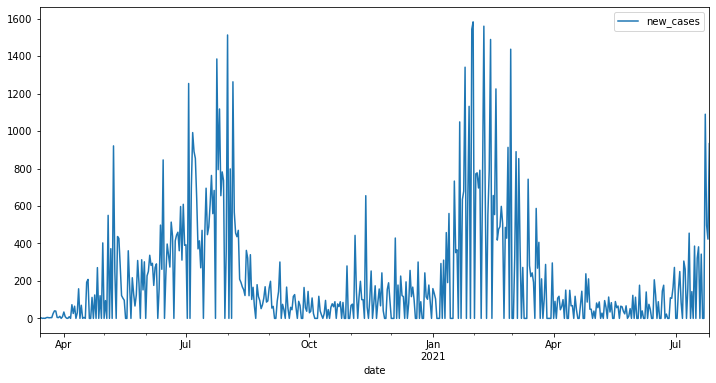

In [10]:
df=dataset
df.plot(figsize=(12,6))

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

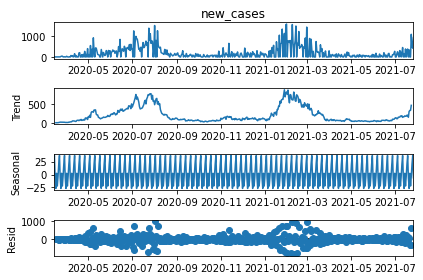

In [12]:
results = seasonal_decompose(df['new_cases'])
results.plot();

In [13]:
len(df)

500

In [44]:
train= df.iloc[:450]
test= df.iloc[450:]

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
df.head(),df.tail()

(            new_cases
 date                 
 2020-03-14        3.0
 2020-03-15        3.0
 2020-03-16        0.0
 2020-03-17        1.0
 2020-03-18        0.0,
             new_cases
 date                 
 2021-07-22        0.0
 2021-07-23     1090.0
 2021-07-24      497.0
 2021-07-25      423.0
 2021-07-26      933.0)

In [47]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [48]:
scaled_train[:10]

array([[0.00189514],
       [0.00189514],
       [0.        ],
       [0.00063171],
       [0.        ],
       [0.00252685],
       [0.00315856],
       [0.00189514],
       [0.00252685],
       [0.00252685]])

In [49]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [50]:
# define generator
n_input = 9
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [51]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00189514 0.00189514 0.         0.00063171 0.         0.00252685
 0.00315856 0.00189514 0.00252685]
Predict this y: 
 [[0.00252685]]


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [53]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [56]:
# fit model
model.fit(generator,epochs=46)

Epoch 1/46
441/441 [==============================] - 1s 3ms/step - loss: 0.0778
Epoch 2/46
441/441 [==============================] - 1s 3ms/step - loss: 0.0776
Epoch 3/46
441/441 [==============================] - 1s 3ms/step - loss: 0.0768
Epoch 4/46
441/441 [==============================] - 1s 3ms/step - loss: 0.0787
Epoch 5/46
441/441 [==============================] - 1s 3ms/step - loss: 0.0758
Epoch 6/46
441/441 [==============================] - 1s 3ms/step - loss: 0.0795
Epoch 7/46
441/441 [==============================] - 1s 3ms/step - loss: 0.0775
Epoch 8/46
441/441 [==============================] - 1s 2ms/step - loss: 0.0769
Epoch 9/46
441/441 [==============================] - 1s 2ms/step - loss: 0.0755
Epoch 10/46
441/441 [==============================] - 1s 2ms/step - loss: 0.0752
Epoch 11/46
441/441 [==============================] - 1s 2ms/step - loss: 0.0753
Epoch 12/46
441/441 [==============================] - 1s 2ms/step - loss: 0.0735
Epoch 13/46
441/441 [====

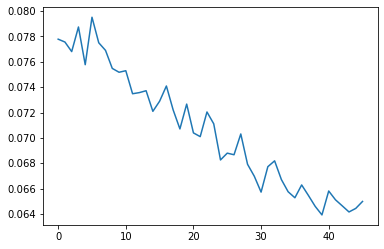

In [57]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [58]:
last_train_batch = scaled_train[-9:]

In [59]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [60]:
model.predict(last_train_batch)

array([[0.03760817]], dtype=float32)

In [61]:
scaled_test[0]

array([0.])

In [62]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [63]:
test_predictions

[array([0.03760817], dtype=float32),
 array([0.02283863], dtype=float32),
 array([0.0228002], dtype=float32),
 array([0.01562363], dtype=float32),
 array([0.01635409], dtype=float32),
 array([0.01449662], dtype=float32),
 array([0.00936189], dtype=float32),
 array([0.01504651], dtype=float32),
 array([0.01511939], dtype=float32),
 array([0.01232815], dtype=float32),
 array([0.01238418], dtype=float32),
 array([0.0122465], dtype=float32),
 array([0.01163604], dtype=float32),
 array([0.01207784], dtype=float32),
 array([0.01146097], dtype=float32),
 array([0.01079425], dtype=float32),
 array([0.01248147], dtype=float32),
 array([0.01179492], dtype=float32),
 array([0.01078135], dtype=float32),
 array([0.01161832], dtype=float32),
 array([0.01160391], dtype=float32),
 array([0.01135887], dtype=float32),
 array([0.01125808], dtype=float32),
 array([0.01130646], dtype=float32),
 array([0.01131748], dtype=float32),
 array([0.01163428], dtype=float32),
 array([0.01119111], dtype=float32),
 ar

In [64]:
test.head()

,new_cases
date,
2021-06-07,0.0
2021-06-08,0.0
2021-06-09,141.0
2021-06-10,0.0
2021-06-11,75.0


In [65]:
true_predictions = scaler.inverse_transform(test_predictions)

In [66]:
test['Predictions'] = true_predictions

<ipython-input-66-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='date'>

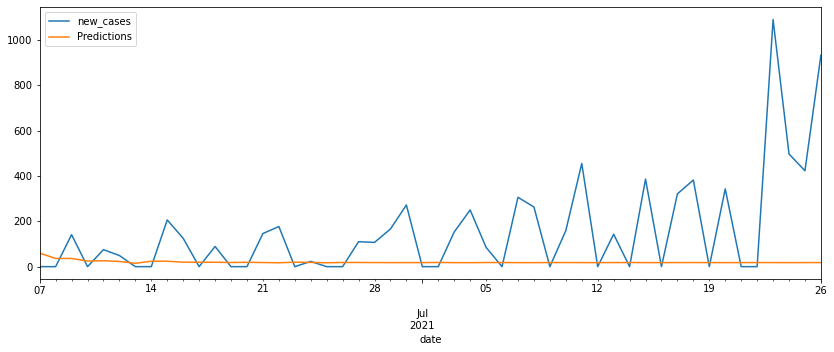

In [67]:
test.plot(figsize=(14,5))

In [68]:
from sklearn.metrics import mean_absolute_error
mae_new_cases=mean_absolute_error(test['new_cases'],test['Predictions'])
print('Mean absolute error of new cases is:',mae_new_cases)

Mean absolute error of new cases is: 155.3292937888205


In [69]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean
rmse_new_cases=math.sqrt(mean_squared_error(test['new_cases'],test['Predictions']))
print('Mean value of new cases is : {}. Root Mean Squared Error is :{}'.format(mean(test['new_cases']),rmse_new_cases))

Mean value of new cases is : 157.5. Root Mean Squared Error is :265.0320204522781
